In [117]:
import numpy as np
import pandas as pd
import operator
from scipy.io import arff
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import multivariate_normal
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import MinMaxScaler

#from sklearn import datasets,linear_model

In [118]:
data_io = arff.loadarff('ionosphere.arff')
dataset_io = pd.DataFrame(data_io[0]).to_numpy()

# 1) Distance measures

Manhattan (L1)

In [119]:
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

Euclidean (L2)


In [120]:
def euclidean_distance(x1, x2):
    diff = x1 - x2
    return np.sqrt(np.dot(diff, diff))

# 3)Numeric Prediction

In [121]:
def sort_distance (attributes_train, attributes_test, target_train, cal_distan):
    dist = []
    for i  in range(0, len(attributes_train)):
        if cal_distan == 'euclidean':
            distance = euclidean_distance(attributes_train[i], attributes_test[0])
        elif cal_distan == 'manhattan':
            distance = manhattan_distance(attributes_train[i], attributes_test[0])
        dist.append((distance, target_train[i]))
    dist = sorted(dist, key=lambda d:d[0])
    return dist

In [122]:
def wnn_classify(k, attributes_train, attributes_test, target_train, target_test, cal_distan):
    dist = sort_distance (attributes_train, attributes_test, target_train, cal_distan)
    correct = 0
    #To avoid total weights to be 0
    total_weights = 0
    total_correct = 0
    for i in range(0, k):
        if dist[i][0] == 0:
            if dist[i][1] == target_test[0]:
                total_correct += 1 / 0.0000000000000001 * 1
            total_weights += 1 / 0.0000000000000001
        else :
            if dist[i][1] == target_test[0]:
                total_correct += (1 / (dist[i][0])**2) * 1
            total_weights += 1 / (dist[i][0])**2
    if total_correct / total_weights > 0.5:
        return 'correct'
    else:
        return 'wrong'

In [123]:
def knn_classify(k, attributes_train, attributes_test, target_train, target_test, cal_distan):
    dist = sort_distance (attributes_train, attributes_test, target_train, cal_distan)
    correct = 0
    for i in range(0, k):
        if dist[i][1] == target_test[0]:
            correct += 1
    if correct / k > 0.5:
        return 'correct'
    else:
        return 'wrong'

In [124]:
def knn_predict(k, attributes_train, attributes_test, price_train, cal_distan):
    dist = sort_distance (attributes_train, attributes_test, price_train, cal_distan)
    sum = 0
    for i in range(0, k):
        sum = sum + dist[i][1]
    return sum/k

In [125]:
def wnn_predict(k, attributes_train, attributes_test, price_train, cal_distan):
    dist = sort_distance (attributes_train, attributes_test, price_train, cal_distan)
    #To avoid total weights to be 0
    total_weights = 0
    total_price = 0
    for i in range(0, k):
        if (dist[i][0] == 0):
            total_price += 1 / 0.0000000000000001 * dist[i][1]
            total_weights += 1 / 0.0000000000000001
        else :
            total_price += (1 / (dist[i][0])**2) * dist[i][1]
            total_weights += 1 / (dist[i][0])**2
    return total_price / total_weights

In [126]:
def cross_validation_prediction(attributes_data, target_data,k, do_what, method, cal_distan):
    loo = LeaveOneOut()
    scaler = MinMaxScaler(feature_range=(0, 1))
    scalar_attributes = scaler.fit_transform(attributes_data.astype(np.float))
    if do_what == 'classify':
        correct_num = 0
    accuracy = []
    #Transform attributes_data to integer scalar array
    for train_index, test_index in loo.split(scalar_attributes):
        attributes_train = scalar_attributes[train_index]
        attributes_test = scalar_attributes[test_index]
        target_train = target_data[train_index]
        target_test = target_data[test_index]
        if do_what == 'predict':
            if method == 'knn':
                predicted_price = knn_predict(k, attributes_train, attributes_test, target_train, cal_distan)
            elif method == 'wnn':
                predicted_price = wnn_predict(k, attributes_train, attributes_test, target_train, cal_distan)
            accuracy.append(abs(predicted_price - target_test[0])/target_test[0])
        elif do_what == 'classify':
            if method == 'knn':
                predicted_class = knn_classify(k, attributes_train, attributes_test, target_train, target_test, cal_distan)
                if predicted_class == 'correct':
                    correct_num += 1
            elif method == 'wnn':
                predicted_class = wnn_classify(k, attributes_train, attributes_test, target_train, target_test, cal_distan)
                if predicted_class == 'correct':
                    correct_num += 1
            accuracy.append(1-(correct_num / (len(attributes_train)+len(attributes_test))))
    if do_what == 'classify':
        return np.min(accuracy)
    elif do_what == 'predict':
        return np.mean(accuracy)

Classification: Leave-one-out cross validation for KNN


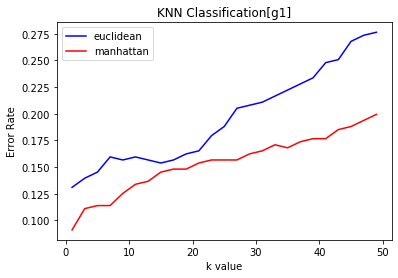

In [127]:
#read the file 
data_io = arff.loadarff('ionosphere.arff')  # dataset for implemention of classification
data_classify = pd.DataFrame(data_io[0])
class_data = data_classify['class'].values
classify_attributes_data = data_classify.drop('class',axis = 1)
print("Classification: Leave-one-out cross validation for KNN")
classify_knn_average_accuracy_euclidean = []
classify_knn_average_accuracy_manhattan = []
n = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49]
for k in range(1,50,2):
    accuracy_euclidean = cross_validation_prediction(classify_attributes_data, class_data,k,'classify', 'knn','euclidean')
    classify_knn_average_accuracy_euclidean.append(accuracy_euclidean)
    accuracy_manhattan = cross_validation_prediction(classify_attributes_data, class_data,k,'classify', 'knn','manhattan')
    classify_knn_average_accuracy_manhattan.append(accuracy_manhattan)
plt.plot(n,classify_knn_average_accuracy_euclidean, 'b-', label='euclidean')
plt.plot(n,classify_knn_average_accuracy_manhattan,'r-', label='manhattan')
plt.title('KNN Classification[g1]')
plt.xlabel('k value')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

Classification: Leave-one-out cross validation for WNN


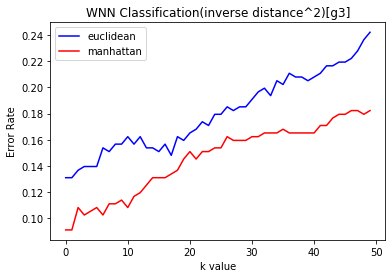

In [128]:
print("Classification: Leave-one-out cross validation for WNN")
classify_wnn_average_accuracy_euclidean = []
classify_wnn_average_accuracy_manhattan = []
for k in range(1,51):
    accuracy_euclidean = cross_validation_prediction(classify_attributes_data, class_data,k,'classify', 'wnn','euclidean')
    classify_wnn_average_accuracy_euclidean.append(accuracy_euclidean)
    accuracy_manhattan = cross_validation_prediction(classify_attributes_data, class_data,k,'classify', 'wnn','manhattan')
    classify_wnn_average_accuracy_manhattan.append(accuracy_manhattan)
plt.plot(classify_wnn_average_accuracy_euclidean, 'b-', label='euclidean')
plt.plot(classify_wnn_average_accuracy_manhattan,'r-', label='manhattan')
plt.legend()
plt.title('WNN Classification(inverse distance^2)[g3]')
plt.xlabel('k value')
plt.ylabel('Error Rate')
plt.show()

Numeric Prediction: Leave-one-out cross validation for KNN


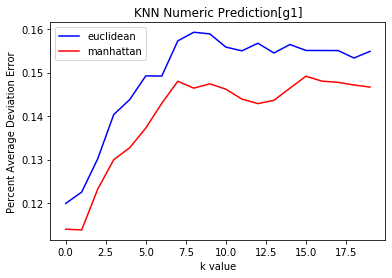

In [129]:
data_auto = arff.loadarff('autos.arff')
data_predict = pd.DataFrame(data_auto[0])
#Remove these attributes now, coz we only use 15 attributes to predict the price
data_predict.drop(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
                'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 
                'fuel-system', 'normalized-losses'], axis=1, inplace=True)
# Remove examples with unknown "?"
filtered = data_predict.dropna()
filtered = data_predict.dropna(how = 'any')

price_data = filtered['price'].values
predict_attributes_data = filtered.drop('price',axis = 1)
print("Numeric Prediction: Leave-one-out cross validation for KNN")
#sqrt(example) is approx 12
predict_knn_average_accuracy_manhattan = []
predict_knn_average_accuracy_euclidean = []
for k in range(1,21):
    accuracy_manhattan = cross_validation_prediction(predict_attributes_data, price_data,k,'predict', 'knn','manhattan')
    predict_knn_average_accuracy_manhattan.append(accuracy_manhattan)
    accuracy_euclidean = cross_validation_prediction(predict_attributes_data, price_data,k,'predict', 'knn','euclidean')
    predict_knn_average_accuracy_euclidean.append(accuracy_euclidean)
plt.plot(predict_knn_average_accuracy_euclidean, 'b-', label='euclidean')
plt.plot(predict_knn_average_accuracy_manhattan, 'r-', label='manhattan')
plt.legend()
plt.title('KNN Numeric Prediction[g1]')
plt.xlabel('k value')
plt.ylabel('Percent Average Deviation Error')
plt.show()

Numeric Prediction: Leave-one-out cross validation for WNN


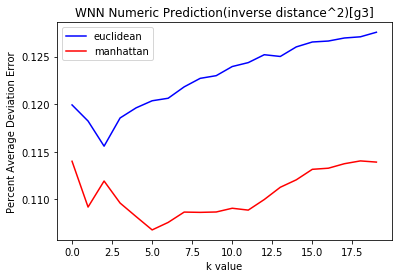

In [130]:
print("Numeric Prediction: Leave-one-out cross validation for WNN")
#sqrt(example) is approx 12
predict_wnn_average_accuracy_manhattan = []
predict_wnn_average_accuracy_euclidean = []
for k in range(1,21):
    accuracy_manhattan = cross_validation_prediction(predict_attributes_data, price_data,k,'predict','wnn', 'manhattan')
    predict_wnn_average_accuracy_manhattan.append(accuracy_manhattan)
    accuracy_euclidean = cross_validation_prediction(predict_attributes_data, price_data,k,'predict','wnn', 'euclidean')
    predict_wnn_average_accuracy_euclidean.append(accuracy_euclidean)
plt.plot(predict_wnn_average_accuracy_euclidean, 'b-', label='euclidean')
plt.plot(predict_wnn_average_accuracy_manhattan, 'r-', label='manhattan')
plt.title('WNN Numeric Prediction(inverse distance^2)[g3]')
plt.xlabel('k value')
plt.ylabel('Percent Average Deviation Error')
plt.legend()
plt.show()

# 4.1) Construct a probabilistic two-class classification target function

In [131]:
class TargetF:
    def __init__(self, mean, covariance, n, label):
        self.mean = mean
        self.covariance = covariance
        self.n = n
        self.label = label
        np.random.seed(85)
    
    def make_points(self):
        return np.random.multivariate_normal(self.mean, self.covariance)
    
    def probability(self, X):
        return multivariate_normal.pdf(X[0], mean = self.mean, cov = self.covariance)
    

def generate_target_function(n, label):
    m = mean(n)
    cov = covariance(n)
    return TargetF(m, cov, n, label)
    
def generate_X_dataset(prior_pr, num_samples, target0, target1):
    vals = np.random.uniform(low=0.0, high=1.0, size=num_samples)
    class0 = []
    class1 = []
    for val in vals:
        if val <= prior_pr:
            class0.append(target0.make_points())
        else:
            class1.append(target1.make_points())
    return np.asarray(class0), np.asarray(class1)    
    
def bayes_error(X, labels, target0, pr0, target1):
    error = 0;
    for x, y in zip(X, labels):
        if y != target0.label:
            error += target0.probability(x)*(1-pr0)
        else:
            error += target1.probability(x)*pr0
    return error
    
    
def dataset_with_labels(class0, label0, class1, label1):
    data0 = np.insert(class0, 0, label0, axis = 1)
    data1 = np.insert(class1, 0, label1, axis = 1)
    whole_dataset = np.concatenate((data0, data1), axis = 0)
    np.random.shuffle(whole_dataset)
        
    x = whole_dataset[:, 1 :]
    y = whole_dataset[:, 0]
    
    return x, y

# dataset with instrances and labels
def test_dataset(pr, n, target0, target1):
    class0, class1 = generate_X_dataset(pr, n, target0, target1)
    return dataset_with_labels(class0, target0.label, class1, target1.label)

In [132]:
def mean(n):
    return np.random.random_sample(n)

def covariance(n):
    vals = []
    vals = np.random.random_sample((n, n))
    cov_matrix = np.dot(vals, vals.transpose())
    return cov_matrix

In [133]:
if __name__=='__main__':
    pr = 0.5
    nSamples = dataset_io.shape[0]
    #print(nSamples)
    nFeatures = dataset_io.shape[1] - 1
    

    mean0 = mean(nFeatures)
    cov0 = covariance(nFeatures)
    target_function0 = TargetF(mean0, cov0, nFeatures, 0)

    mean1 = mean(nFeatures)
    cov1 = covariance(nFeatures)
    target_function1 = TargetF(mean1, cov1, nFeatures, 1)

    class0, class1 = generate_X_dataset(pr, nSamples, target_function0, target_function1)
    #print(class0.shape)
    #print(class1.shape)

    X, y = dataset_with_labels(class0, 0, class1, 1)
    #print(X.shape)
    #print(y.shape)
    
    bayes_error_rate = bayes_error(X, y, target_function0, pr, target_function1)
    print('This is bayes error rate: {0}'.format(bayes_error_rate))

This is bayes error rate: 1.2224012877448268e-17


# Testing the dataset by using k-NN

In [134]:
cross_validation_prediction(X, y, 1, 'classify', 'knn', 'manhattan')

0.19658119658119655

In [135]:
cross_validation_prediction(X, y, 1, 'classify', 'knn', 'euclidean')

0.18518518518518523

In [136]:
cross_validation_prediction(X, y, 9, 'classify', 'knn', 'manhattan')

0.21082621082621078

In [137]:
cross_validation_prediction(X, y, 9, 'classify', 'knn', 'euclidean')

0.17948717948717952

In [138]:
cross_validation_prediction(X, y, 27, 'classify', 'knn', 'manhattan')

0.33618233618233617

In [139]:
cross_validation_prediction(X, y, 27, 'classify', 'knn', 'euclidean')

0.27350427350427353

In [140]:
cross_validation_prediction(X, y, 81, 'classify', 'knn', 'manhattan')

0.44729344729344733

In [141]:
cross_validation_prediction(X, y, 81, 'classify', 'knn', 'euclidean')

0.4330484330484331

# Testing the dataset by using w-NN

In [142]:
cross_validation_prediction(X, y, 1, 'classify', 'wnn', 'manhattan')

0.19658119658119655

In [143]:
cross_validation_prediction(X, y, 1, 'classify', 'wnn', 'euclidean')

0.18518518518518523

In [144]:
cross_validation_prediction(X, y, 9, 'classify', 'wnn', 'manhattan')

0.19373219373219375

In [145]:
cross_validation_prediction(X, y, 9, 'classify', 'wnn', 'euclidean')

0.1737891737891738

In [146]:
cross_validation_prediction(X, y, 27, 'classify', 'wnn', 'manhattan')

0.27350427350427353

In [147]:
cross_validation_prediction(X, y, 27, 'classify', 'wnn', 'euclidean')

0.2136752136752137

In [148]:
cross_validation_prediction(X, y, 81, 'classify', 'wnn', 'manhattan')

0.33618233618233617

In [149]:
cross_validation_prediction(X, y, 81, 'classify', 'wnn', 'euclidean')

0.301994301994302